# <a id='toc1_'></a>[Circle Notation Activity](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Circle Notation Activity](#toc1_)    
  - [Objectives](#toc1_1_)    
  - [Guidelines](#toc1_2_)    
  - [Development](#toc1_3_)    
    - [Imports](#toc1_3_1_)    
    - [Function Development](#toc1_3_2_)    
    - [Secondary Functions](#toc1_3_3_)    
      - [Relative_phase](#toc1_3_3_1_)    
      - [Phase2RGB](#toc1_3_3_2_)    
      - [Plot_Color_Spectrum](#toc1_3_3_3_)    
    - [Main Function](#toc1_3_4_)    
  - [Examples](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Objectives](#toc0_)
Through this activity, you will be able to acquire the necessary skills to work with the quantum state and its evolution using circle notation.

## <a id='toc1_2_'></a>[Guidelines](#toc0_)

Implement a function that allows visually representing the state of the quantum register using circle notation. Circle notation has been described in topic 3.



## <a id='toc1_3_'></a>[Development](#toc0_)

In this section we will implement a python function called `Circles` that allows us to represent the state of one qubit using circle notation. The function will receive as input the state of the qubit and will return a plot with the corresponding circle notation.

### <a id='toc1_3_1_'></a>[Imports](#toc0_)

In this activity, we will use the following packages:

In [11]:
#Graphical representation of complex numbers
import matplotlib.pyplot as plt
import colorsys


# Math tools
import numpy as np
import math
import cmath

# Quantum Computing tools
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer


### <a id='toc1_3_2_'></a>[Function Development](#toc0_)

In this section we will develop the necessary functions to represent the state of the quantum register using circle notation. We will also document the functions both using docstrings and in markdown cells.

### <a id='toc1_3_3_'></a>[Secondary Functions](#toc0_)

In this section we will develop secondady functions that will be used in the main function. This functions are:
* **Relative_phase**: This function will calculate the relative phase between two complex numbers.
* **Phase2RGB**: This function will convert the phase of a complex number to a color.
* **Plot_Color_Spectrum**: This function will plot the color spectrum.

All these functions will be used in the main function to represent the state of the quantum register using circle notation.

#### <a id='toc1_3_3_1_'></a>[Relative_phase](#toc0_)

This function will calculate the relative phase between two complex numbers. The function will receive a quantum state defined by two complex numbers and will return the relative phase between their components. To ilustrate this lets consider the following state:

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

where $\alpha$ and $\beta$ are complex numbers. We can reformulate this state as:

$$|\psi\rangle = r_1e^{i \theta_1}|0\rangle + r_2 e^{i\theta_2} |1\rangle$$

where $r$ is the magnitude of the complex number and $\theta$ is the phase of the complex number. The relative phase between the two components of the state is given by:

$$|\psi\rangle = r_1|0\rangle + r_2 e^{i(\theta_2-\theta_1)} |1\rangle = |\psi\rangle = r_1|0\rangle + r_2 e^{i \theta_{relative}} |1\rangle $$

$$ \theta_{relative} = \theta_2 - \theta_1 $$

This phase will be fixed to a value between $0$ and $2\pi$.

In [12]:
def Relative_phase(state):
    """
    This function calculates the relative phase between two complex numbers

    Parameters:
    state (list): List of complex numbers representing the quantum state

    Returns:
    relative_phase (float): Relative phase between a and b
    """

    # Calculate the phase of each complex number
    phase_a = cmath.phase(state[0])
    phase_b = cmath.phase(state[1])

    # Calculate the relative phase
    relative_phase = phase_b - phase_a

    # Relative phase is between 0 and 2pi
    relative_phase = (relative_phase + 2* cmath.pi) % (2*math.pi)

    return relative_phase


#### <a id='toc1_3_3_2_'></a>[Phase2RGB](#toc0_)

This function will convert a phase to a color. The function will receive a phase and will return a color. The color will be represented by a tuple of three values between 0 and 255.

In [13]:
def phase2RGB(phase):
    """
    Map a phase of a complex number to a color in (r, g, b).
    
    Parameters:
    phase (float): Phase of a complex number
    
    Returns:
    rgb (tuple): RGB values
    """
    rgb = colorsys.hls_to_rgb(phase / (np.pi * 2), 0.5, 0.5)
    return rgb


#### <a id='toc1_3_3_3_'></a>[Plot_Color_Spectrum](#toc0_)

This function will plot the color spectrum. The function will receive a list of phases and will plot the color spectrum for each phase. We will use this to have a reference palette of colors to represent the state of the quantum register.

In [14]:
def plot_color_spectrum(num_points=1000):
    """
    Plot a circle with a spectrum of colors based on the angle.
    
    Parameters:
    num_points (int): Number of points to plot

    Returns:
    None
    """
    angles = np.linspace(0, 2 * np.pi, num_points)
    colors = [phase2RGB(angle) for angle in angles]

    fig, ax = plt.subplots(subplot_kw=dict(polar=True))

    ax.scatter(angles, np.ones_like(angles), c=colors, s=5000, marker='o', cmap='hsv', alpha=0.75)
    # Remove radial grid and labels
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.grid(False)
    ax.text(0, 0, "Phase Spectrum", ha='center', va='center', color='black')
    plt.show()

Once we have developed the secondary functions, we will develop the main function. This function will receive a one qubit quantum state and will represent it using circle notation.

### <a id='toc1_3_4_'></a>[Main Function](#toc0_)

This function will receive a one qubit quantum state defined by two complex numbers and will represent it using circle notation. To do so the function will follow the next steps:

1. Calculate the modulus of the complex numbers.
2. Calculate the relative phase between the complex numbers.
3. Plot the unit circles for each component.
4. Plot the state circle inside the unit circle with radius equal to the modulus of the complex number and color equal to the relative phase.
5. Plot the radius of the circle at the relative phase.


In [15]:

def Circles(state):
    """
    This function prints the circles representing the complex numbers a and b where the radius is the modulus
    since the modules are less or equal than 1, the circles are inside the unit circle

    Parameters:
    state (list): List of complex numbers representing the quantum state

    Returns:
    None
    """
    # Calculate the modulus of each complex number
    modulus_a = abs(state[0])
    modulus_b = abs(state[1])
    phase = Relative_phase(state)
    
    # If state is not not normalized, normalize it and raise a warning
    if modulus_a**2 + modulus_b**2 != 1:
        print("The state is not normalized, normalizing it...")
        modulus_a = modulus_a / math.sqrt(modulus_a**2 + modulus_b**2)
        modulus_b = modulus_b / math.sqrt(modulus_a**2 + modulus_b**2)
        print("The state is normalized")
    
    # Rais an error if the state contains more than one qubit
    if len(np.asarray(state)) != 2:
        raise ValueError("The state must contain only one qubit represented by two complex numbers")


    # Print the circles unit circles and the circles representing the complex numbers inside
    #Unitary circles
    unit_circle1 = plt.Circle((0, 0), 1, color='black', fill=False)
    unit_circle2 = plt.Circle((2.5, 0), 1, color='black', fill=False)
    
    #Circles representing the complex numbers
    circle_a = plt.Circle((0, 0), modulus_a, color='b', fill=True)
    circle_b = plt.Circle((2.5, 0), modulus_b, color=phase2RGB(phase), fill=True)
    
    #Plot
    fig, ax = plt.subplots()
    ax.set_xlim((-1.2, 3.7))
    ax.set_ylim((-1.5, 1.5))
    ax.add_artist(unit_circle1)
    ax.add_artist(unit_circle2)
    ax.add_artist(circle_a)
    ax.add_artist(circle_b)
    # Add circle label
    ax.text(0, 1.3, "0", ha='center', va='center', color='black')
    ax.text(2.5, 1.3, "1", ha='center', va='center', color='black')
    
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])

    plt.plot([0, modulus_a], [0, 0], color='black')
    plt.plot([2.5, 2.5+modulus_b*math.cos(phase)], [modulus_b*math.sin(phase), 0], color='black')
    plt.show()

    # Print color spectrum
    plot_color_spectrum()

## <a id='toc1_4_'></a>[Examples](#toc0_)

In this section we will show some examples of the function.

We will first build some quantum states using simple gates. 

In [16]:
# Using qiskit we will try these functions in different quantum states
# Backend to simulate the quantum circuit
backend = Aer.get_backend('statevector_simulator')


# Quantum state 1
q = QuantumRegister(1)
qc = QuantumCircuit(q)

# Apply Hadamard gate
qc.h(q[0])

# Quantum state 2
q2 = QuantumRegister(1)
qc2 = QuantumCircuit(q2)

# Apply X gate
qc2.x(q2[0])
# Apply Hadamard gate
qc2.h(q2[0])

# Quantum state 3
q3 = QuantumRegister(1)
qc3 = QuantumCircuit(q3)

# Apply X gate
qc3.x(q3[0])
# Apply Hadamard gate
qc3.h(q3[0])
# Apply S gate
qc3.s(q3[0])

# Quantum state 4
q4 = QuantumRegister(1)
qc4 = QuantumCircuit(q4)

# Apply Hadamard gate
qc4.h(q4[0])
# Apply S gate
qc4.s(q4[0])

Usinf the function `Circles` we will represent the state of the different quantum register using circle notation.

Quantum state:  Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Relative phase:  0.0 pi


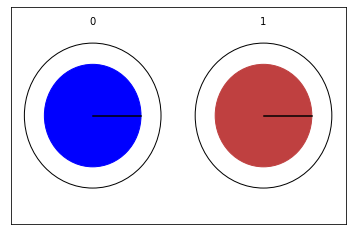

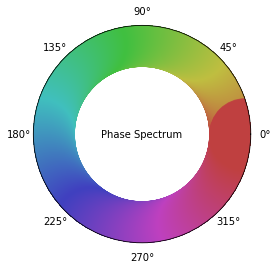

In [17]:
job = execute(qc, backend)
result = job.result()
state = result.get_statevector(qc)

relative_phase = Relative_phase(state)

print("Quantum state: ", state)
print("Relative phase: ", relative_phase/math.pi, "pi")
Circles(state)

Quantum state:  Statevector([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j],
            dims=(2,))
Relative phase:  1.0 pi


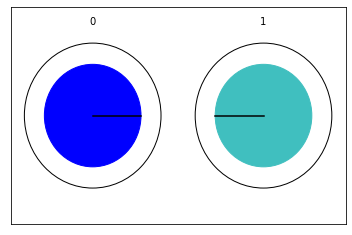

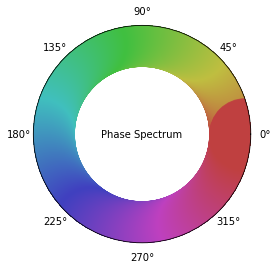

In [18]:
job = execute(qc2, backend)
result = job.result()
state = result.get_statevector(qc2)

relative_phase = Relative_phase(state)

print("Quantum state: ", state)
print("Relative phase: ", relative_phase/math.pi, "pi")
Circles(state)

Quantum state:  Statevector([7.07106781e-01+0.j        , 4.32978028e-17-0.70710678j],
            dims=(2,))
Relative phase:  1.5 pi


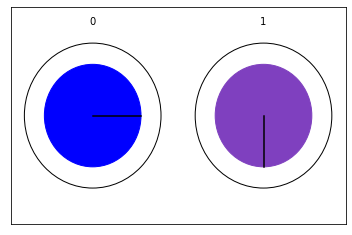

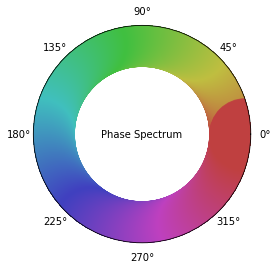

In [19]:
job = execute(qc3, backend)
result = job.result()
state = result.get_statevector(qc3)

relative_phase = Relative_phase(state)

print("Quantum state: ", state)
print("Relative phase: ", relative_phase/math.pi, "pi")
Circles(state)

Quantum state:  Statevector([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j],
            dims=(2,))
Relative phase:  0.5 pi


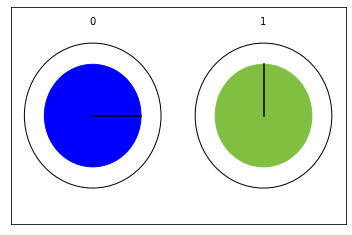

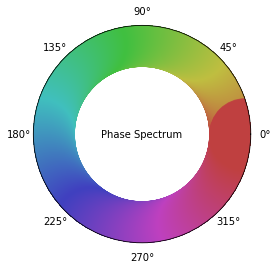

In [25]:
job = execute(qc4, backend)
result = job.result()
state = result.get_statevector(qc4)

relative_phase = Relative_phase(state)

print("Quantum state: ", state)
print("Relative phase: ", relative_phase/math.pi, "pi")
Circles(state)